In [1]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#paths to load csv files
VIO_Data_1= pd.read_csv("Resources/VIO_Data_1_Final.csv")
VIO_Data_2= pd.read_csv("Resources/VIO_Data_2_Final.csv")
VIO_US_Data = pd.read_csv("Resources/VIO_US_Data.csv")
ACES_Data = pd.read_csv("Resources/ACES_Data.csv")
Parts_Data = pd.read_csv("Resources/Parts_Data.csv")
Population_Data = pd.read_csv("Resources/State_Population.csv")

#merge the data into a single data set
VIO_Data_Complete = pd.merge(VIO_Data_1, VIO_Data_2, how="outer")
print(f'The length of VIO Data 1 is: {len(VIO_Data_1)} rows.')
print(f'The length of VIO Data 2 is: {len(VIO_Data_2)} rows.')
print(f'The length of merged VIO Data is: {len(VIO_Data_Complete)} rows.')

The length of VIO Data 1 is: 114382 rows.
The length of VIO Data 2 is: 155815 rows.
The length of merged VIO Data is: 270197 rows.


In [2]:
#print out the first 5 rows of the data set
VIO_Data_Complete.head()

,VehicleID,State,Year,Make,VIO
0,545,Wisconsin,1993,Land Rover,2.0
1,545,Montana,1993,Land Rover,9.0
2,545,New Hampshire,1993,Land Rover,6.0
3,545,Wyoming,1993,Land Rover,2.0
4,545,Florida,1993,Land Rover,14.0


In [3]:
#display counts of rows by column to determine if we need to drop any missing values
VIO_Data_Complete.count()

VehicleID    270197
State        268231
Year         270197
Make         270197
VIO          268231
dtype: int64

In [4]:
#we found that there were blank rows in the State and VIO columns, so we are dropping all blanks
VIO_Data_Clean = VIO_Data_Complete.dropna(how="any")

#verify that the counts are now correct
VIO_Data_Clean.count()

VehicleID    268231
State        268231
Year         268231
Make         268231
VIO          268231
dtype: int64

In [5]:
#check data types of the VIO data set
VIO_Data_Clean.dtypes

VehicleID      int64
State         object
Year           int64
Make          object
VIO          float64
dtype: object

In [6]:
#add age of cars column
VIO_Data_Clean['Age'] = 2019 - VIO_Data_Clean['Year']
VIO_Data_Clean.head()

/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,VehicleID,State,Year,Make,VIO,Age
0,545,Wisconsin,1993,Land Rover,2.0,26
1,545,Montana,1993,Land Rover,9.0,26
2,545,New Hampshire,1993,Land Rover,6.0,26
3,545,Wyoming,1993,Land Rover,2.0,26
4,545,Florida,1993,Land Rover,14.0,26


In [7]:
Makes = VIO_Data_Clean.groupby('Make')
Makes.head()

,VehicleID,State,Year,Make,VIO,Age
0,545,Wisconsin,1993,Land Rover,2.0,26
1,545,Montana,1993,Land Rover,9.0,26
2,545,New Hampshire,1993,Land Rover,6.0,26
3,545,Wyoming,1993,Land Rover,2.0,26
4,545,Florida,1993,Land Rover,14.0,26
398,238632,Wisconsin,2017,Jaguar,54.0,2
399,238632,Montana,2017,Jaguar,4.0,2
400,238632,New Hampshire,2017,Jaguar,16.0,2
401,238632,Wyoming,2017,Jaguar,6.0,2
402,238632,Florida,2017,Jaguar,807.0,2


In [8]:
Make_VIO = Makes['VIO'].sum()
Make_VIO

Make
Audi             2047227.0
BMW              4460541.0
Jaguar            456487.0
Land Rover        726037.0
Mercedes-Benz    4589723.0
Mini              707000.0
Porsche           680758.0
Saab              235215.0
Volkswagen       4723686.0
Volvo            1524833.0
Name: VIO, dtype: float64

In [9]:
###Data Frame

#put all the variables into a dataframe named school_summary_df
Makes_VIO_Summary = pd.DataFrame({"Total VIO": Make_VIO})

#remove the display of the index name
#print the dataframe, showing all rows
Makes_VIO_Summary = Makes_VIO_Summary.sort_values('Total VIO', ascending = False)
Makes_VIO_Summary

,Total VIO
Make,
Volkswagen,4723686.0
Mercedes-Benz,4589723.0
BMW,4460541.0
Audi,2047227.0
Volvo,1524833.0
Land Rover,726037.0
Mini,707000.0
Porsche,680758.0
Jaguar,456487.0


In [10]:
Small_VIO = VIO_Data_Clean.groupby(['Make','VehicleID'])
# Small_VIO.head(5)

In [11]:
Make_Vehicle_VIO = Small_VIO['VIO'].sum()
Make_Vehicle_VIO.head()

Make  VehicleID
Audi  17501        14.0
      17506        17.0
      17515        11.0
      17521        35.0
      17537         4.0
Name: VIO, dtype: float64

In [12]:
Make_Vehicle_VIO_Summary = pd.DataFrame({"Total VIO": Make_Vehicle_VIO})
Make_Vehicle_VIO_Summary.head()

Total VIO
Make VehicleID           
Audi 17501           14.0
     17506           17.0
     17515           11.0
     17521           35.0
     17537            4.0

In [13]:
Make_Vehicle_VIO_Summary['Total VIO'].sum()

20151507.0

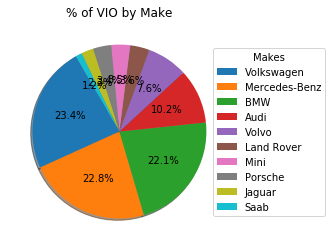

In [14]:
##Find the Percents##

#slices = sorted(Makes_VIO_Summary['Total VIO'])
slices = Makes_VIO_Summary.sort_values(by=['Total VIO'], ascending=False)

#labels = ["Volkswagen", "Mercedes-Benz", "BMW", "Audi", "Volvo", "Land Rover", "Mini", "Porsche", "Jaguar", "Saab"]

#assign the pie sizes, explode the urban city type and apply the labels and colors from above
plt.pie(slices['Total VIO'],autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of VIO by Make")
plt.legend(labels=slices.index, bbox_to_anchor=(1,.5), fontsize = 10, title= "Makes", loc="center right", bbox_transform=plt.gcf().transFigure)

#save the pie chart
#plt.savefig("Images/Rides_by_City_Type.png")

#show the pie chart
plt.show()

In [15]:
Makes_VIO_Summary

,Total VIO
Make,
Volkswagen,4723686.0
Mercedes-Benz,4589723.0
BMW,4460541.0
Audi,2047227.0
Volvo,1524833.0
Land Rover,726037.0
Mini,707000.0
Porsche,680758.0
Jaguar,456487.0


In [16]:
#output clean VIO data to a CSV file
VIO_Data_Complete.to_csv("Output/VIO_Complete.csv", index=False, header=True)

In [17]:
#print out the first five lines of the ACES data set
ACES_Data.head()

,ShortPartNumber,VehicleID
0,000000000884,15200.0
1,20388002239040,15200.0
2,0375456528,15200.0
3,228613009,15200.0
4,000010128564,15200.0


In [18]:
#check data types in ACES dataset
ACES_Data.dtypes

ShortPartNumber     object
VehicleID          float64
dtype: object

In [19]:
#display counts of rows by column to determine if we need to drop any missing values
ACES_Data.count()

ShortPartNumber    2192930
VehicleID          2191708
dtype: int64

In [20]:
#we found that there were blank rows in the VehicleID column, so we are dropping all blanks
ACES_Data_Clean = ACES_Data.dropna(how="any")

#verify that the counts are now correct
ACES_Data_Clean.count()

ShortPartNumber    2191708
VehicleID          2191708
dtype: int64

In [21]:
#Vehicle ID should be int, not float
ACES_Data_Clean['VehicleID'] = ACES_Data_Clean['VehicleID'].astype(int)
#ACES_Data_Clean_1.dtypes
ACES_Data_Clean.dtypes

/anaconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ShortPartNumber    object
VehicleID           int64
dtype: object

In [22]:
#check data types of the ACES data set
ACES_Data.dtypes

ShortPartNumber     object
VehicleID          float64
dtype: object

In [23]:
#print out the first five lines of the Parts data set
Parts_Data.head()

,ShortPartNumber,Main Category,Part Type Name,QTY
0,30758260,Engine,Timing Belt Kit,41
1,TB234K1,Engine,Timing Belt Kit,14
2,159321100,Engine,Timing Belt Kit,10
3,TB131K1,Engine,Timing Belt Kit,433
4,TB032K1,Engine,Timing Belt Kit,47


In [24]:
#display counts of rows by column to determine if we need to drop any missing values
Parts_Data.count()

ShortPartNumber    44620
Main Category      44602
Part Type Name     44608
QTY                44620
dtype: int64

In [25]:
#we found that there were blank rows in several columns, so we are dropping all blanks
Parts_Data_Clean = Parts_Data.dropna(how="any")

#verify that the counts are now correct
Parts_Data_Clean.count()

ShortPartNumber    44602
Main Category      44602
Part Type Name     44602
QTY                44602
dtype: int64

In [26]:
#check data types of the Parts data set
Parts_Data.dtypes

ShortPartNumber    object
Main Category      object
Part Type Name     object
QTY                 int64
dtype: object

In [27]:
merge_on_partNumber = pd.DataFrame.merge(Parts_Data_Clean, ACES_Data_Clean, how='inner', on='ShortPartNumber')
merge_on_partNumber.head()

,ShortPartNumber,Main Category,Part Type Name,QTY,VehicleID
0,30758260,Engine,Timing Belt Kit,41,1510
1,30758260,Engine,Timing Belt Kit,41,1506
2,30758260,Engine,Timing Belt Kit,41,1511
3,30758260,Engine,Timing Belt Kit,41,1513
4,30758260,Engine,Timing Belt Kit,41,1507


In [28]:
#make smaller dataframe from VIO_Data_Complete
VIO_Data_Clean_columns = VIO_Data_Clean[['VehicleID','Make', 'VIO']]

#groupby VehicleID and sum the VIO
VIO_Data_Clean_Sum_VIO = VIO_Data_Clean_columns.groupby(['VehicleID', 'Make'])['VIO'].sum()

#convert to a datafame from a series to be able to merge back to table
Sum_VIO_df = pd.DataFrame(VIO_Data_Clean_Sum_VIO)
Sum_VIO_df.head()
reset_index_df = Sum_VIO_df.reset_index()

#final merge to add VIO sum to merge_on_partNumber dataframe
final_merged_dataframe = pd.DataFrame.merge(merge_on_partNumber, reset_index_df, how='left', on='VehicleID')
final_merged_dataframe.head()

,ShortPartNumber,Main Category,Part Type Name,QTY,VehicleID,Make,VIO
0,30758260,Engine,Timing Belt Kit,41,1510,Volvo,1727.0
1,30758260,Engine,Timing Belt Kit,41,1506,Volvo,1855.0
2,30758260,Engine,Timing Belt Kit,41,1511,Volvo,1136.0
3,30758260,Engine,Timing Belt Kit,41,1513,Volvo,1222.0
4,30758260,Engine,Timing Belt Kit,41,1507,Volvo,2946.0


In [29]:
#print out the first 5 rows of the data set
Population_Data.head()

,State,2018 Population
0,California,39776830
1,Texas,28704330
2,Florida,21312211
3,New York,19862512
4,Pennsylvania,12823989


In [30]:
Population_Data.count()

State              51
2018 Population    51
dtype: int64

In [31]:
State_VIO = VIO_Data_Clean.groupby('State')
# State_VIO.head()

State_VIO = State_VIO['VIO'].sum()
State_VIO.head()

State
Alabama        212723.0
Alaska          28225.0
Arizona        421964.0
Arkansas        76232.0
California    3738561.0
Name: VIO, dtype: float64

In [32]:
###Data Frame

#put all the variables into a dataframe named school_summary_df
State_VIO_Summary = pd.DataFrame({"Total State VIO": State_VIO})

#remove the display of the index name
#print the dataframe, showing all rows
State_VIO_Summary = State_VIO_Summary.sort_values('Total State VIO', ascending = False)
State_VIO_Summary.head()

,Total State VIO
State,
California,3738561.0
Florida,1632867.0
Texas,1409170.0
New York,1168534.0
Pennsylvania,864158.0


In [33]:
#final merge to add VIO sum to merge_on_partNumber dataframe
final_merged_VIO = pd.DataFrame.merge(Population_Data, State_VIO_Summary, how='left', on='State')
final_merged_VIO.head()

,State,2018 Population,Total State VIO
0,California,39776830,3738561.0
1,Texas,28704330,1409170.0
2,Florida,21312211,1632867.0
3,New York,19862512,1168534.0
4,Pennsylvania,12823989,864158.0


In [34]:
#New shit
#Need to drop NaN value in order to use linregress to find slope for number of cars per individual

print(len(final_merged_VIO))
final_merged_VIO = final_merged_VIO.dropna(how='any')
print(len(final_merged_VIO))

51
50


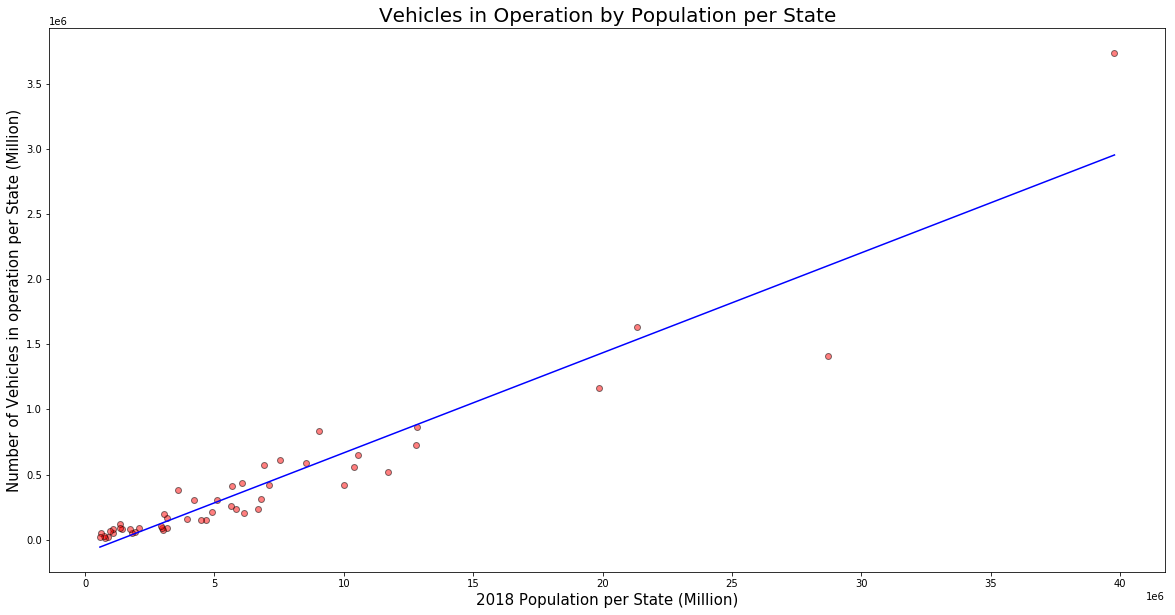

number of cars per person is 0.076823737092745


In [38]:
# plot population vs VOI, fit a line and determine how many cars per person avg
from scipy.stats import linregress

plt.figure(figsize = (20,10))
plt.scatter(final_merged_VIO['2018 Population'], final_merged_VIO['Total State VIO'], marker = "o",
           facecolors = "red", edgecolor= "black", alpha= 0.5)
plt.title("Vehicles in Operation by Population per State", fontsize = 20)
plt.xlabel("2018 Population per State (Million)", fontsize = 15)
plt.ylabel("Number of Vehicles in operation per State (Million)", fontsize = 15)
plt.ticklabel_format(style='sci',scilimits=(6,6),axis='y')
plt.ticklabel_format(style='sci',scilimits=(6,6),axis='x')


x_axis_series = final_merged_VIO['2018 Population']
y_axis_series = final_merged_VIO['Total State VIO']

#find slope for # of cars per person on average in the US
slope, intercept, *_ = linregress(x_axis_series, y_axis_series)
fit = slope * x_axis_series  + intercept
plt.plot(x_axis_series, fit, 'b', label='top')

plt.show()

print(f'number of cars per person is {slope}')


In [36]:
#Making one more table for graphing sales QTY vs VIO per part category

final_merged_dataframe_col_clean = final_merged_dataframe[['Main Category', 'QTY', 'VIO']]
final_merged_dataframe_col_clean.head()
Sales_vs_VIO = final_merged_dataframe.groupby(['Main Category'])['QTY','VIO'].sum()
Sales_vs_VIO

,QTY,VIO
Main Category,,
Accessories and Fluids,480406077,7.849633e+08
Air and Fuel Delivery,42613441,3.818048e+08
Body,139182318,1.114200e+09
"Body Electrical, Lighting, Relays, and Switches",78615856,6.293807e+08
Brake,50621522,4.120895e+08
"Charging, Engine Electrical, and Starting",8112061,1.473907e+08
Cooling and Drive Belts,79547312,6.135790e+08
"Differential, Driveline, and Axles",22799301,2.343265e+08
Emission Control,25037389,2.870108e+08


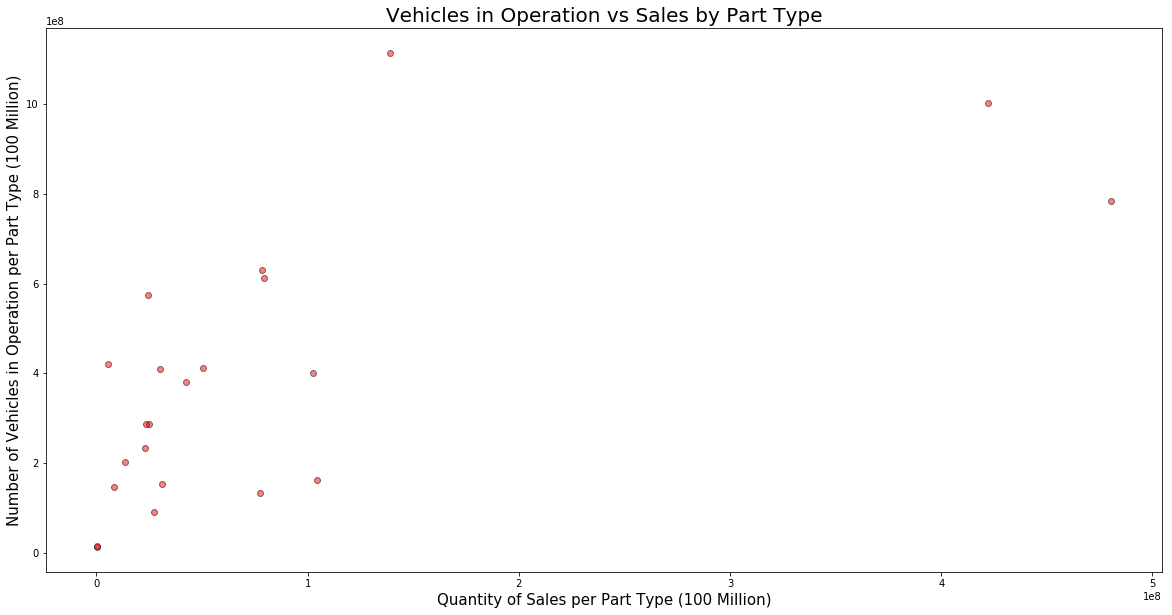

In [37]:
#graph sales QTY vs VIO

plt.figure(figsize = (20,10))
plt.scatter(Sales_vs_VIO['QTY'], Sales_vs_VIO['VIO'], marker = "o",
           facecolors = "red", edgecolor= "black", alpha= 0.5)

plt.title("Vehicles in Operation vs Sales by Part Type", fontsize = 20)
plt.xlabel("Quantity of Sales per Part Type (100 Million)", fontsize = 15)
plt.ylabel("Number of Vehicles in Operation per Part Type (100 Million)", fontsize = 15)
plt.ticklabel_format(style='sci',scilimits=(8,8),axis='y')
plt.ticklabel_format(style='sci',scilimits=(8,8),axis='x')


pandas.core.groupby.generic.DataFrameGroupBy

In [40]:
final_merged_dataframe.head()

,ShortPartNumber,Main Category,Part Type Name,QTY,VehicleID,Make,VIO
0,30758260,Engine,Timing Belt Kit,41,1510,Volvo,1727.0
1,30758260,Engine,Timing Belt Kit,41,1506,Volvo,1855.0
2,30758260,Engine,Timing Belt Kit,41,1511,Volvo,1136.0
3,30758260,Engine,Timing Belt Kit,41,1513,Volvo,1222.0
4,30758260,Engine,Timing Belt Kit,41,1507,Volvo,2946.0


In [48]:
Qty_Make_Merge = pd.DataFrame.merge(Make_Vehicle_VIO_Summary, final_merged_dataframe, how='left', on='VehicleID')
print(len(Qty_Make_Merge))
Qty_Make_Merge = Qty_Make_Merge.dropna(how='any')
print(len(Qty_Make_Merge))

1967438
1966882


In [49]:
Qty_Make_Merge.head()

,VehicleID,Total VIO,ShortPartNumber,Main Category,Part Type Name,QTY,Make,VIO
6,17559,58.0,034260849,Cooling and Drive Belts,Drive Belt,20.0,Audi,58.0
7,17559,58.0,N0203535,Emission Control,Vacuum Hose,718.0,Audi,58.0
8,17559,58.0,443955465,Wiper and Washer,Headlight Washer Pump Grommet,1319.0,Audi,58.0
9,17559,58.0,10222A,Tools and Equipment,Engine Lift,5.0,Audi,58.0
10,17559,58.0,M0030A,Tools and Equipment,Wheel Lug Bolt Hole Alignment Tool,71.0,Audi,58.0


In [56]:
Qty_Make_Merge = Qty_Make_Merge[['Make', 'QTY']]
Qty_Make_Merge.head()

Qty_Make_Groupby = Qty_Make_Merge.groupby(['Make'])['QTY'].sum()
Qty_Make_Groupby_df = pd.DataFrame(Qty_Make_Groupby)
Qty_Make_Groupby_df

,QTY
Make,
Audi,115550872.0
BMW,536100277.0
Jaguar,2830070.0
Land Rover,7159924.0
Mercedes-Benz,594448888.0
Mini,35798204.0
Porsche,117035583.0
Saab,10732902.0
Volkswagen,133808202.0


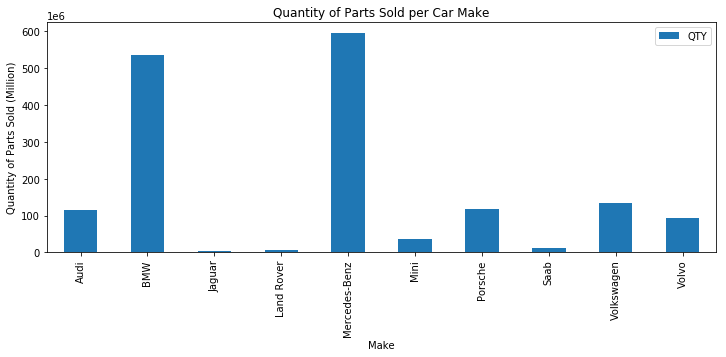

In [59]:
Qty_Make_Groupby_df.plot.bar(figsize=(10,5))
plt.ticklabel_format(style='sci',scilimits=(6,6),axis='y')

plt.tight_layout()
plt.title("Quantity of Parts Sold per Car Make")
plt.ylabel("Quantity of Parts Sold (Million)")
plt.xlabel("Make")

plt.show()